<a href="https://colab.research.google.com/github/JapnoorManku/cpsc3620project/blob/main/cpsc3620proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from functools import lru_cache

# Simulated IsWord function using a dictionary lookup
word_dict = {"ARTIST": True, "OIL": True, "ART": True, "IS": True, "TOIL": True,
             "BOT": True, "HEART": True, "HAND": True, "SAT": True, "URNS": True, "PIN": True,
             "PIN": True, "START": True, "RAPS": True, "AND": True, "RAGS": True, "LAP": True}

def IsWord(word: str) -> bool:
    return word in word_dict

# (a) Compute the number of partitions of A into words
def count_partitions(A: str) -> int:
    n = len(A)
    dp = [0] * (n + 1)
    dp[0] = 1  # Base case: one way to split an empty string

    for i in range(1, n + 1):
        for j in range(i):
            if IsWord(A[j:i]):
                dp[i] += dp[j]

    return dp[n]

# (b) Decide whether A and B can be partitioned into words at the same indices
def can_partition_same_indices(A: str, B: str) -> bool:
    n = len(A)
    dp = [False] * (n + 1)
    dp[0] = True  # Base case

    for i in range(1, n + 1):
        for j in range(i):
            if IsWord(A[j:i]) and IsWord(B[j:i]) and dp[j]:
                dp[i] = True
                break

    return dp[n]

# (c) Compute the number of different ways that A and B can be partitioned into words at the same indices
def count_partition_same_indices(A: str, B: str) -> int:
    n = len(A)
    dp = [0] * (n + 1)
    dp[0] = 1  # Base case

    for i in range(1, n + 1):
        for j in range(i):
            if IsWord(A[j:i]) and IsWord(B[j:i]):
                dp[i] += dp[j]

    return dp[n]

# Example tests
A = "ARTISTOIL"
B1 = "BOTHEARTHANDSATURNSPIN"
B2 = "PINSTARTRAPSANDRAGSLAP"
print("(a) Count of partitions:", count_partitions(A))
print("(b) Can partition at same indices:", can_partition_same_indices(B1, B2))
print("(c) Count of same index partitions:", count_partition_same_indices(B1, B2))

(a) Count of partitions: 2
(b) Can partition at same indices: True
(c) Count of same index partitions: 1


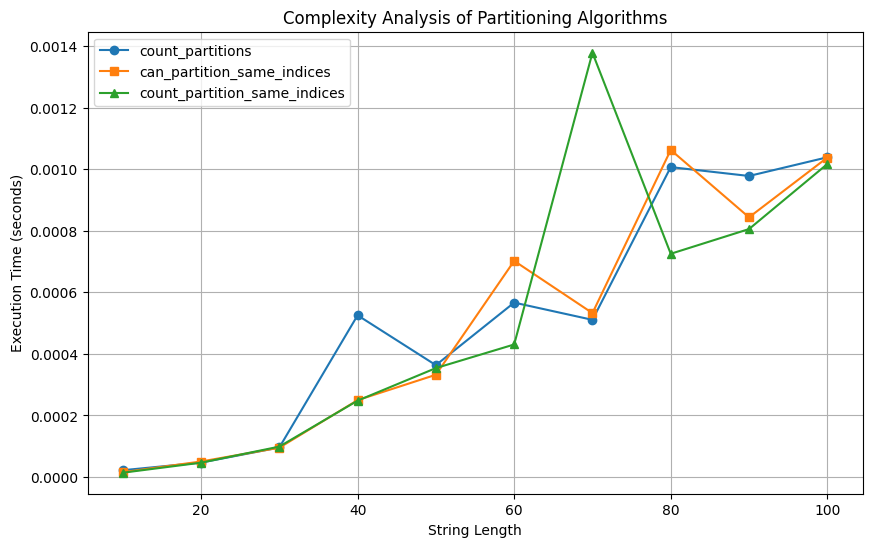

In [3]:
import time
import matplotlib.pyplot as plt
import random
import string

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_uppercase, k=length))

def measure_time(func, *args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

# Generate test cases of increasing sizes
sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
times_a = []
times_b = []
times_c = []

for size in sizes:
    A = generate_random_string(size)
    B = generate_random_string(size)

    times_a.append(measure_time(count_partitions, A))
    times_b.append(measure_time(can_partition_same_indices, A, B))
    times_c.append(measure_time(count_partition_same_indices, A, B))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, times_a, marker='o', label='count_partitions')
plt.plot(sizes, times_b, marker='s', label='can_partition_same_indices')
plt.plot(sizes, times_c, marker='^', label='count_partition_same_indices')

plt.xlabel("String Length")
plt.ylabel("Execution Time (seconds)")
plt.title("Complexity Analysis of Partitioning Algorithms")
plt.legend()
plt.grid()
plt.show()